energy conservation:
particles have problems with energy especially when time step is large or equivalently when force changes abruptly or equivalently when the particle moves quickly. Possible solutions:
1. small step size: easy, but computationally costly
2. quadratic trees: loop back and subdivide time steps recursively when a particle's position changes too quickly. maybe less bad computationally for given precision
3. do something like looking at force in a circle around particle based on velocity to see if it's very different
basically the problem arises due to noncontinuous change of force on the particle before/after the time step. When the discontinuity is bad, energy is lost or gained in ways that are difficult to account for

inverse-square forces:
problems arise when particles that experience an inverse-square (or general inverse-distance scaling) force approach each other very closely. The high velocities involved tend to kick the particles well past each other and they end up shooting off to infinity.
1. decreasing step size helps in some cases but does not address the fundamental problem
2. can simply stop simulation when particles come too close (i.e. collide)
3. slipping-past:
    when two particles get close enough for a few conditions to be fulfilled:
    i. moving quickly compared to all other particles
    ii. force due to mutual attraction much stronger than all other forces
    iii. on collision course (this is hard to determine esp. in systems of more than two particles. if two such particles are quite close they will usually collide unless another 'strong' force changes things, so comparing scales of velocity/distance/force has to be enough)
    then resolve the singularity by:
    i. moving the particles past each other. Mirror them across their center of mass, if one is nonfree consider its location to be the COM.
    ii. they retain their velocities, magnitude and direction
    iii. 


runge-kutta 4 method:
better estimation of movement than euler's method which I have currently implemented. Since i'm starting with the second derivative 

In [1]:
from dreamtime import *

def xForce(particle1):
    x=particle1.x
    return{particle1: -1*x}

def cForce(particle1,particle2):
    q1=particle1.charges[coulombForce]
    q2=particle2.charges[coulombForce]
    r=(particle1.x-particle2.x)

    f=0.2*q1*q2/abs(r)
    
    f1=f/r
    f2=-f/r
    
    return {particle1:f1,particle2:f2}


here=universe(100,.01,maxDistanceStep=0.001)

springForce=force(xForce,1)
springForce.join(here)
coulombForce=force(cForce,2)
coulombForce.join(here)



In [2]:

freeParticle=particle(10,0,1)
freeParticle.join(coulombForce)
freeParticle.chargedUnder(coulombForce,-1)

fixedParticle=particle(0,0,1,free=False)
fixedParticle.join(coulombForce)
fixedParticle.chargedUnder(coulombForce,1)

here.dreamtime()

times=here.times
path=freeParticle.path


this universe dreams...


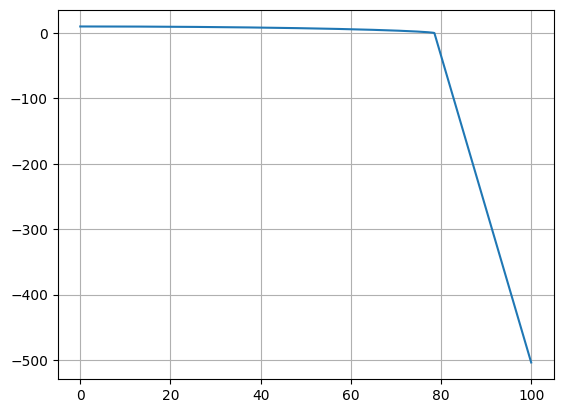

565600

In [3]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.plot(times,path)
plt.grid()
#plt.hlines([10,-10],0,100)
plt.show()
len(times)


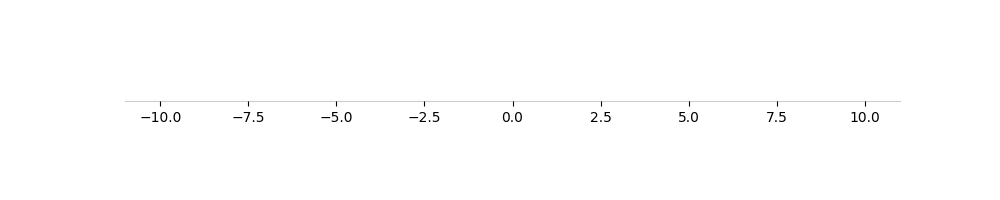

In [4]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig=plt.figure(figsize=(10,2))
ax=plt.subplot()

ax.set(xlim=(-11,11),ylim=(-1,1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set(alpha=0.2)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
scatter=ax.scatter(path[0],0,color='r',s=50)

def update(frame):
    numFrames=100
    whichPointOfPath=np.argmin(np.abs(np.array(times)-(frame/numFrames)*(max(times))))
    x=path[whichPointOfPath]
    scatter.set_offsets((x,0))
    return (scatter)

anim=animation.FuncAnimation(fig=fig,func=update,frames=100,interval=30)
anim.save(filename='anim.gif',writer='pillow')